In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [129]:
df = pd.read_csv('../BD/Supermercado.csv')

In [130]:
dias_semana = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

df['dia'] = df['order_dow'].map(dias_semana)

df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,Miércoles
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,Miércoles
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,Miércoles
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,Miércoles
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,Miércoles


In [131]:
df = df.dropna()

In [132]:
def order_time(x):
    if x in[6, 7, 8, 9, 10, 11, 12]:
        return 'Morning'
    if x in[13, 14, 15, 16, 17]:
        return 'Afternoon'
    if x in[18, 19, 20, 21, 22]:
        return 'Night'
    if x in[23, 24, 0, 1, 2, 3, 4, 5]:
        return 'Dawn'
    return x

In [133]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)
df.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia,order_time_list
922252,1057556,138518,2,5,9,13.0,115,14,1,7,beverages,water seltzer sparkling water,Sábado,Morning
869383,2434589,180578,8,1,12,12.0,106,3,1,12,meat seafood,hot dogs bacon sausage,Martes,Morning
890286,1027937,63373,2,2,19,8.0,108,8,0,16,dairy eggs,other creams cheeses,Miércoles,Night
174052,2900632,175768,41,0,12,8.0,120,2,1,16,dairy eggs,yogurt,Lunes,Morning
1974936,2708700,678,6,6,21,15.0,9,4,0,9,dry goods pasta,pasta sauce,Domingo,Night


In [134]:
max_order_numbers = df.groupby('user_id')['order_number'].max().reset_index()
max_order_numbers.rename(columns={'order_number': 'max_order'}, inplace=True)

df = df.merge(max_order_numbers, on='user_id', how='left')

#### CLUSTERING

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

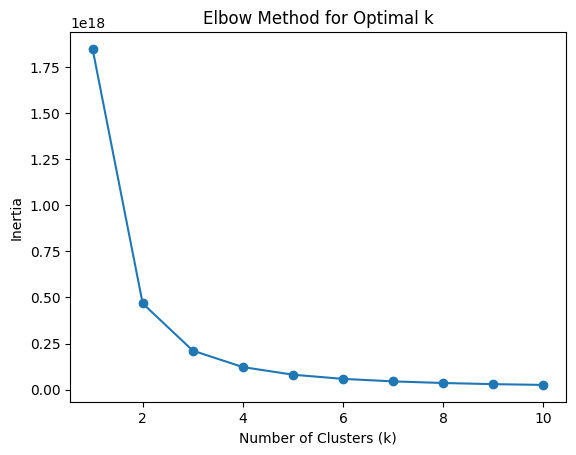

In [135]:
X = df[['order_id', 'user_id', 'max_order', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id']]

inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


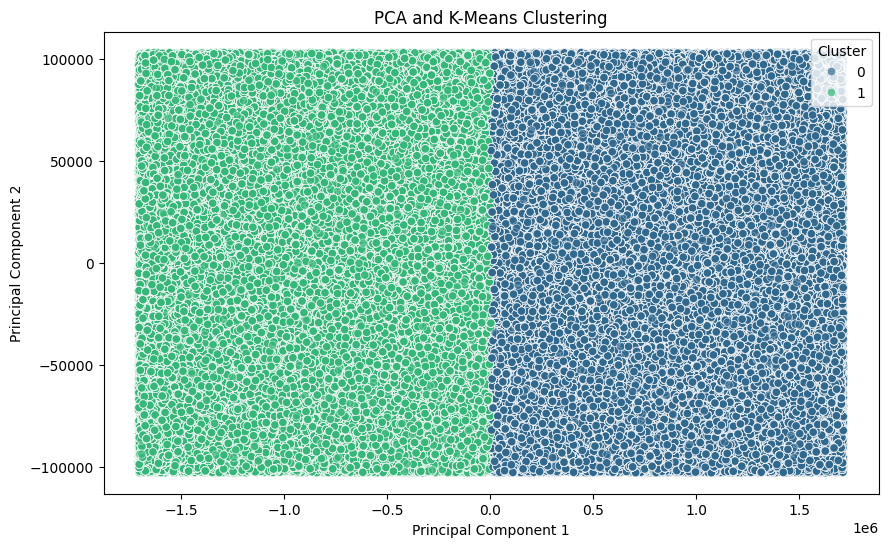

In [136]:
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c1 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c1['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c1, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


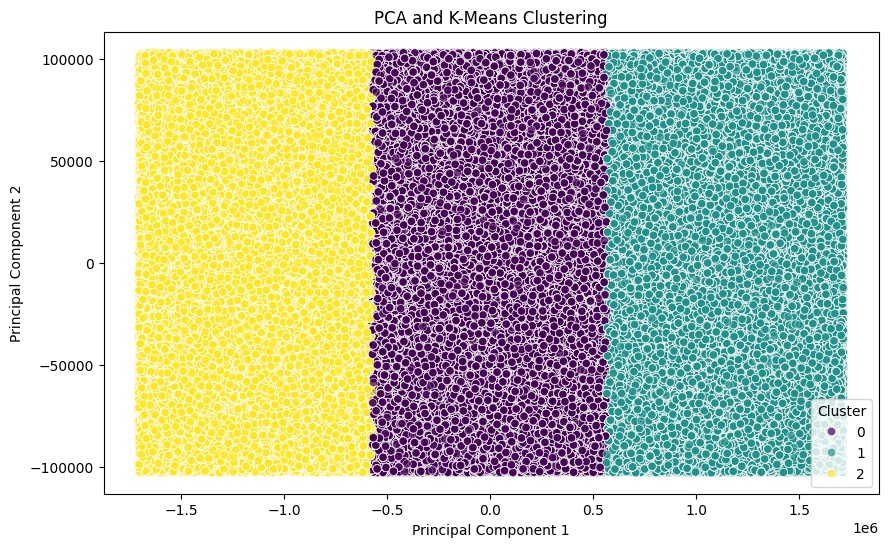

In [137]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


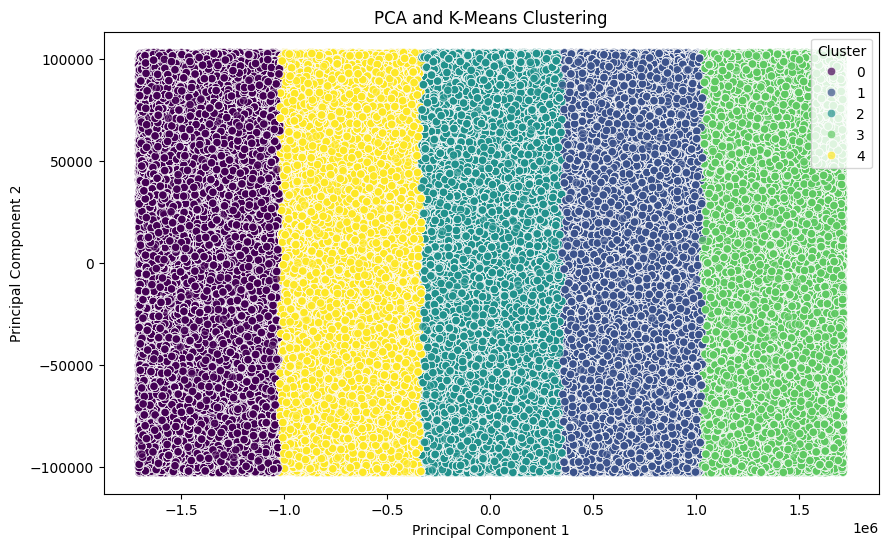

In [138]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [139]:
df['ClusterPrueba'] = labels

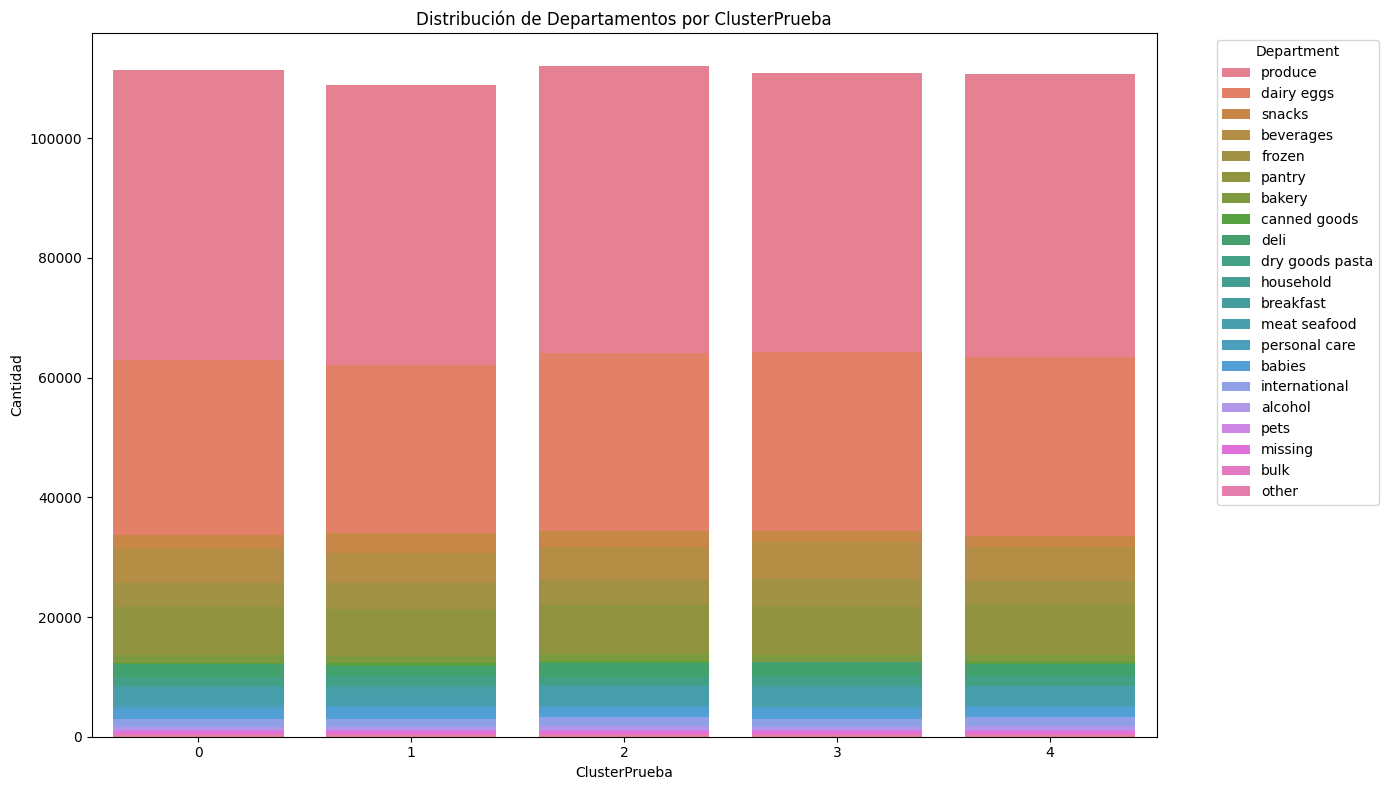

In [140]:
plt.figure(figsize=(14, 8))
sns.barplot(x='ClusterPrueba', y='Count', hue='Department', data=department_distribution_df, dodge=False)
plt.title('Distribución de Departamentos por ClusterPrueba')
plt.xlabel('ClusterPrueba')
plt.ylabel('Cantidad')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

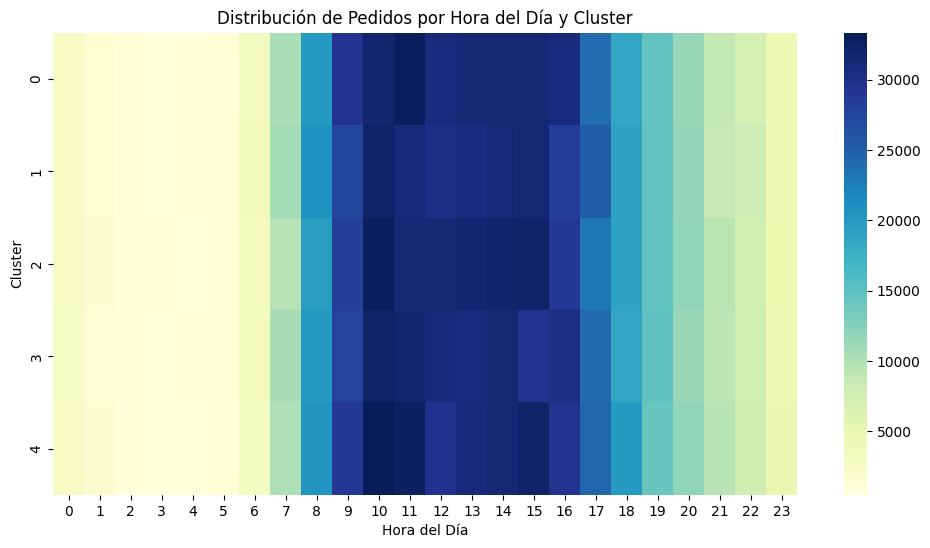

In [141]:
order_hour_counts = df.groupby(['ClusterPrueba', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(order_hour_counts, cmap='YlGnBu', annot=False)
plt.title('Distribución de Pedidos por Hora del Día y Cluster')
plt.xlabel('Hora del Día')
plt.ylabel('Cluster')
plt.show()

##### Clusterización en base a Department_id

In [142]:
X2 = df[['user_id', 'department_id', 'product_id', 'max_order']]

In [143]:
X_train = X2.values

kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

print("The cluster are  :", kmeans.labels_)

print("The Inertia is :", kmeans.inertia_)

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The cluster are  : [5 5 5 ... 3 3 3]
The Inertia is : 186256076948012.5


Text(0.5, 1.0, 'Inertia Plot per k')

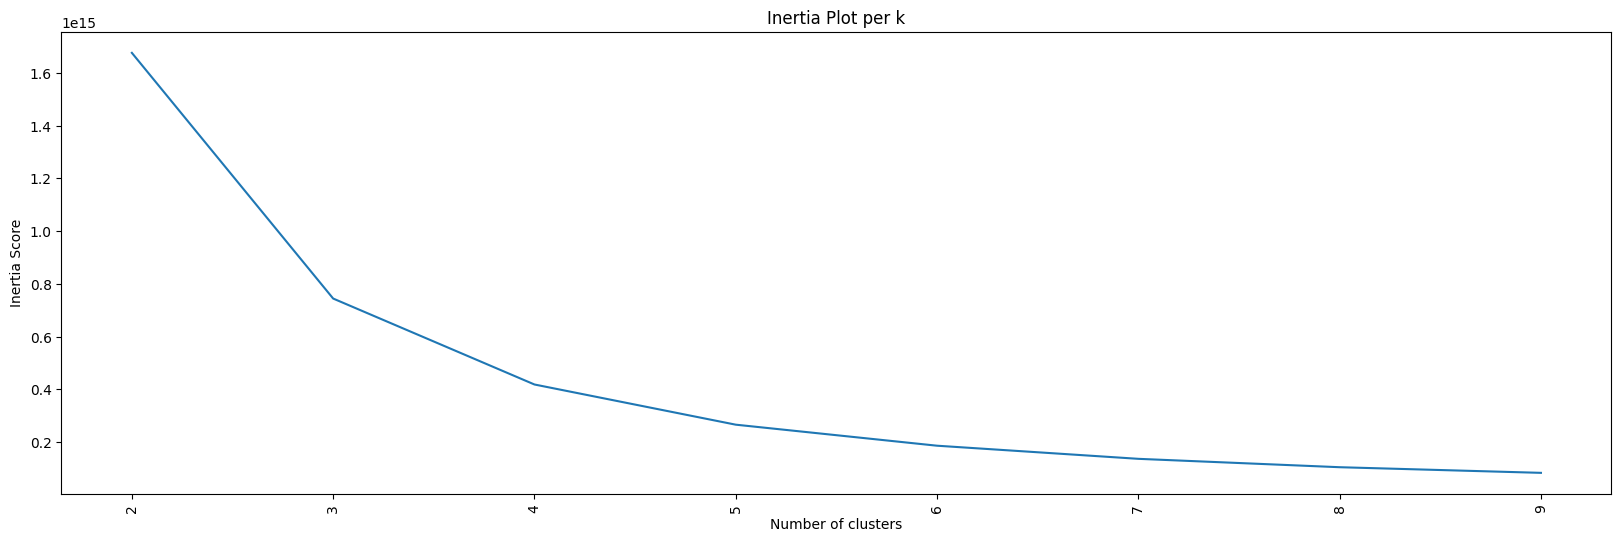

In [144]:
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

In [145]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

predictions = kmeans.predict(X_train)

unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

countscldf

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,380071,375126,382880,374330,382752


In [146]:
kmeans.labels_

array([3, 3, 3, ..., 3, 3, 3])

In [147]:
predictions

array([3, 3, 3, ..., 3, 3, 3])

Explained variance ratio (first two components): [9.99999424e-01 4.13018790e-07]


<Figure size 640x480 with 0 Axes>

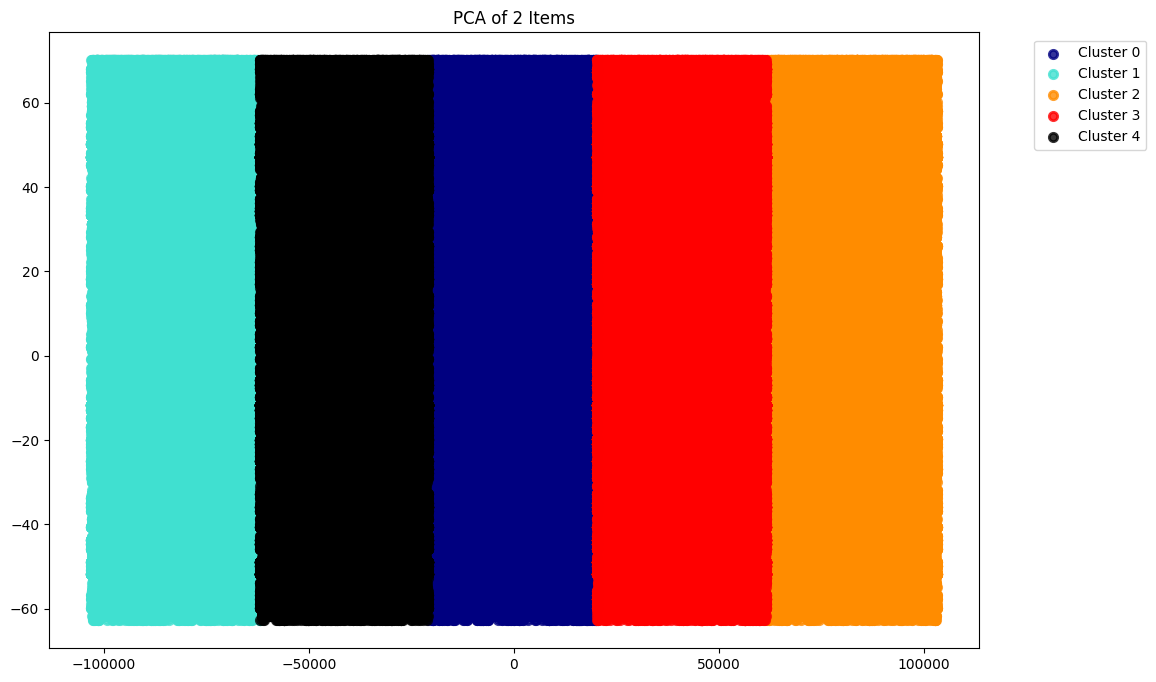

In [148]:
X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [149]:
df['Clusters'] = kmeans.labels_

In [150]:
cluster_describe = df.groupby('Clusters').describe()
print(cluster_describe)

          order_id                                                          \
             count          mean            std   min       25%        50%   
Clusters                                                                     
0         380071.0  1.706789e+06  983374.528142  28.0  857960.0  1694575.0   
1         375126.0  1.703158e+06  986669.103548  64.0  845222.0  1701784.0   
2         382880.0  1.704547e+06  985542.982152  62.0  847878.0  1706908.0   
3         374330.0  1.708522e+06  990723.425012  10.0  851208.0  1703692.5   
4         382752.0  1.713247e+06  984427.770570  38.0  857266.0  1718528.0   

                                 user_id                 ... max_order         \
                75%        max     count           mean  ...       75%    max   
Clusters                                                 ...                    
0         2556242.0  3420977.0  380071.0  102683.339287  ...      39.0  100.0   
1         2558217.0  3420940.0  375126.0   20648.40

In [151]:
department_counts = df.groupby('Clusters')['department_id'].value_counts()
print(department_counts)

Clusters  department_id
0         4                110993
          16                63531
          19                33577
          7                 31713
          1                 26124
          13                22154
          3                 13713
          15                12430
          20                12209
          9                 10202
          12                 8502
          17                 8479
          14                 8270
          11                 5203
          18                 4983
          6                  3239
          5                  1872
          8                  1119
          21                  891
          10                  442
          2                   425
1         4                110557
          16                62581
          19                33506
          7                 31318
          1                 25415
          13                21508
          3                 13593
          15            

In [152]:
df.head(1)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia,order_time_list,max_order,ClusterPrueba,Clusters
0,1201011,147243,14,0,16,3.0,94,1,0,7,beverages,tea,Lunes,Afternoon,38,4,3


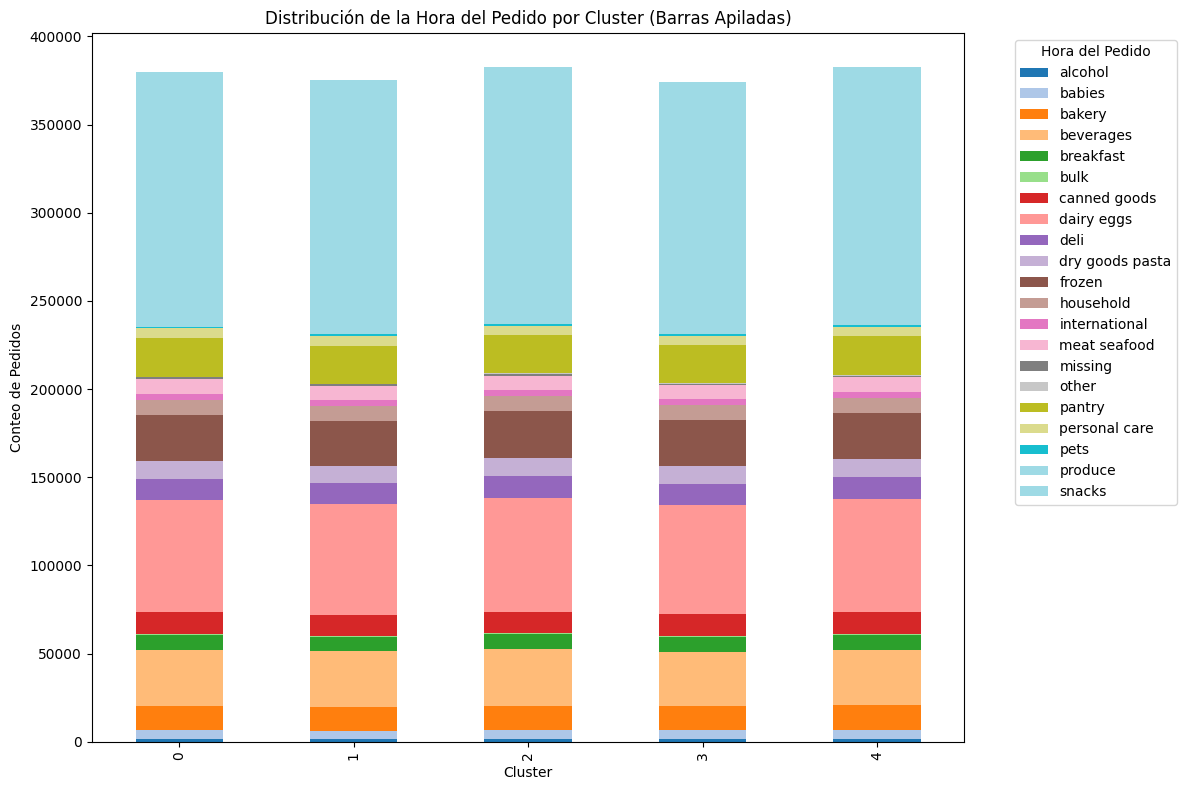

In [153]:
pivot_table = pd.crosstab(df['Clusters'], df['department'])
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribución de la Hora del Pedido por Cluster (Barras Apiladas)')
plt.xlabel('Cluster')
plt.ylabel('Conteo de Pedidos')
plt.legend(title='Hora del Pedido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

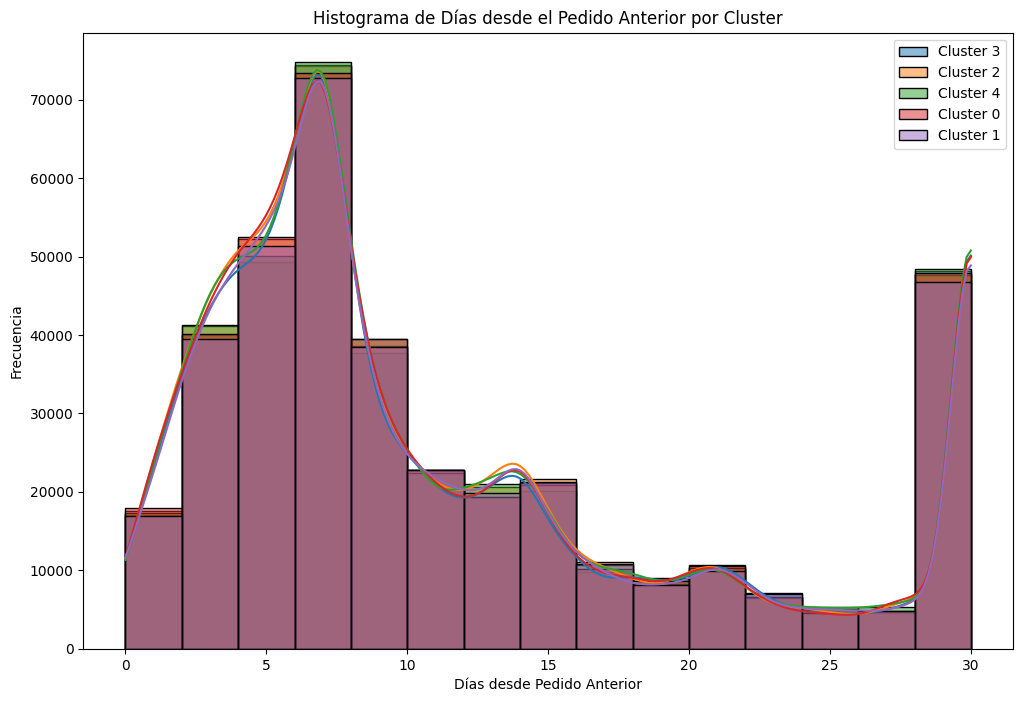

In [154]:
plt.figure(figsize=(12, 8))
for cluster in df['Clusters'].unique():
    sns.histplot(df[df['Clusters'] == cluster]['days_since_prior_order'], label=f'Cluster {cluster}', kde=True, bins=15)
plt.title('Histograma de Días desde el Pedido Anterior por Cluster')
plt.xlabel('Días desde Pedido Anterior')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()